# Importing the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Layer, Flatten, LayerNormalization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Data Preparation and Exploration

In [ ]:
#Loading training and test data
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')


In [ ]:
# Separate labels from pixels
train_labels = train_data['label']
train_images = train_data.drop(columns=['label'])

test_labels = test_data['label']
test_images = test_data.drop(columns=['label'])

#Convert the data to numpy format and scale the pixel values ​​to the range [0, 1]
train_images = train_images.values.reshape(-1, 28, 28, 1) / 255.0
test_images = test_images.values.reshape(-1, 28, 28, 1) / 255.0

train_labels = train_labels.values
test_labels = test_labels.values


In [ ]:
# Checking for missing data
print("Checking for missing data...")
missing_train = train_images.size - np.count_nonzero(~np.isnan(train_images))
missing_test = test_images.size - np.count_nonzero(~np.isnan(test_images))

print(f"Number of missing values ​​in training data: {missing_train}")
print(f"Number of missing values ​​in test data: {missing_test}")


Checking for missing data...
Number of missing values ​​in training data: 0
Number of missing values ​​in test data: 0


In [ ]:
# Checking dimensional consistency
train_shapes = [img.shape for img in train_images]
test_shapes = [img.shape for img in test_images]

unique_train_shapes = set(train_shapes)
unique_test_shapes = set(test_shapes)

print(f"Unique image shapes in the training set: {unique_train_shapes}")
print(f"Unique image shapes in the test set: {unique_test_shapes}")

# If the result is just {(28, 28, 1)} -> the data is valid.


Unique image shapes in the training set: {(28, 28, 1)}
Unique image shapes in the test set: {(28, 28, 1)}


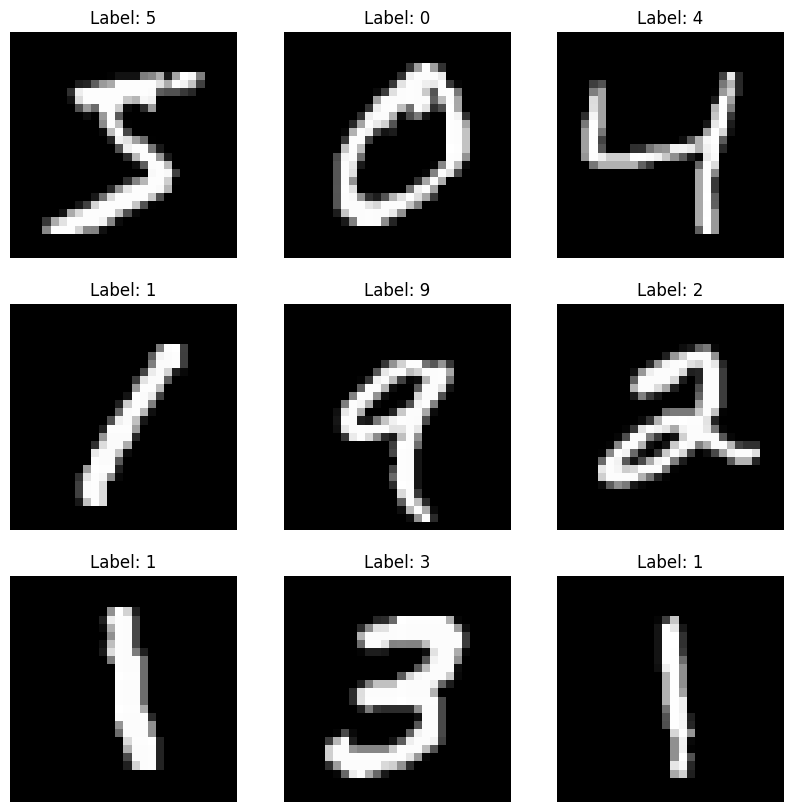

In [ ]:
plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.show()


# Convolutional Neural Network (CNN)

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Model Training

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 35ms/step - accuracy: 0.8935 - loss: 0.3280 - val_accuracy: 0.9831 - val_loss: 0.0522
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - accuracy: 0.9846 - loss: 0.0497 - val_accuracy: 0.9899 - val_loss: 0.0309
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - accuracy: 0.9901 - loss: 0.0335 - val_accuracy: 0.9888 - val_loss: 0.0363
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9928 - loss: 0.0243 - val_accuracy: 0.9892 - val_loss: 0.0371
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 33ms/step - accuracy: 0.9941 - loss: 0.0178 - val_accuracy: 0.9924 - val_loss: 0.0259
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9954 - loss: 0.0135 - val_accuracy: 0.9921 - val_loss: 0.0245
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - accuracy: 0.9958 - loss: 0.0126 - val_accuracy: 0.9913 - val_loss: 0.0265
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9965 -

# Model Evaluation

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f'\nTest accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9882 - loss: 0.0509

Test accuracy: 0.9902999997138977


# Visualizing Results

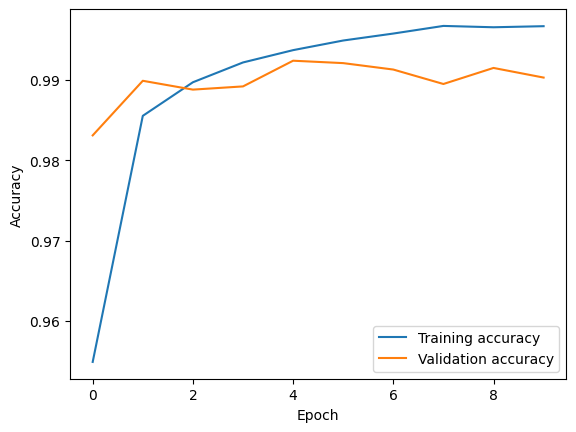

In [ ]:
# Accuracy chart
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

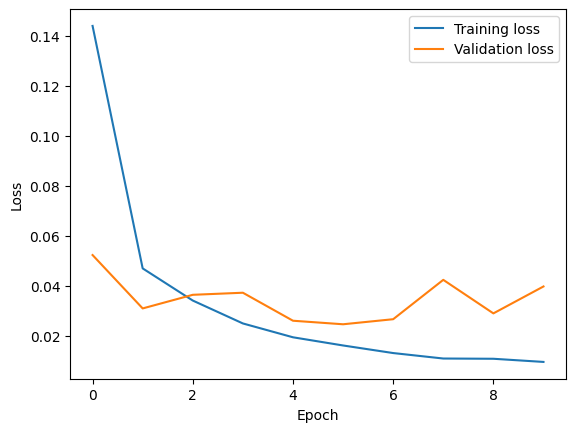

In [ ]:
# Loss chart
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


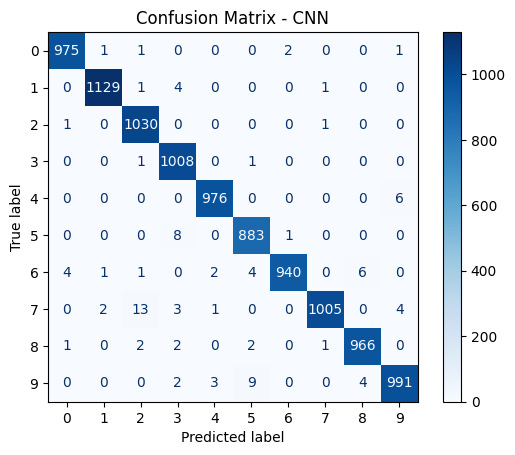

In [ ]:
# Predictions of the CNN model on the test set
cnn_predictions = model.predict(test_images)
cnn_predicted_labels = np.argmax(cnn_predictions, axis=1)

# Confusion Matrix for CNN
cm_cnn = confusion_matrix(test_labels, cnn_predicted_labels)
disp_cnn = ConfusionMatrixDisplay(confusion_matrix=cm_cnn, display_labels=range(10))
disp_cnn.plot(cmap='Blues')
plt.title('Confusion Matrix - CNN')
plt.show()

# Transfer Learning Model (ResNet50)

In [ ]:
# Definition of the ResNet50 base model
base_model = tf.keras.applications.ResNet50(input_shape=(32, 32, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # zamrożenie wag modelu bazowego

# Definition of the transfer learning model based on ResNet50
model_tl = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.image.grayscale_to_rgb(tf.image.resize(x, (32, 32)))),  # konwersja do RGB
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [ ]:
# Model compilation and training
model_tl.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_tl = model_tl.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 319s 162ms/step - accuracy: 0.9131 - loss: 0.2871 - val_accuracy: 0.9312 - val_loss: 0.2332
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 364s 184ms/step - accuracy: 0.9183 - loss: 0.2690 - val_accuracy: 0.9349 - val_loss: 0.2212
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 377s 201ms/step - accuracy: 0.9236 - loss: 0.2500 - val_accuracy: 0.9369 - val_loss: 0.2131
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 332s 175ms/step - accuracy: 0.9244 - loss: 0.2456 - val_accuracy: 0.9331 - val_loss: 0.2212
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 354s 160ms/step - accuracy: 0.9264 - loss: 0.2367 - val_accuracy: 0.9386 - val_loss: 0.2016
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 323s 161ms/step - accuracy: 0.9312 - loss: 0.2240 - val_accuracy: 0.9435 - val_loss: 0.1891
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 320s 159ms/step - accuracy: 0.9314 - loss: 0.2220 - val_accuracy: 0.9437 - val_loss: 0.1883
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 319s 158ms/step - ac

In [ ]:
test_loss, test_acc = model_tl.evaluate(test_images, test_labels)

print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 138ms/step - accuracy: 0.9321 - loss: 0.2149
Test accuracy: 0.9415000081062317


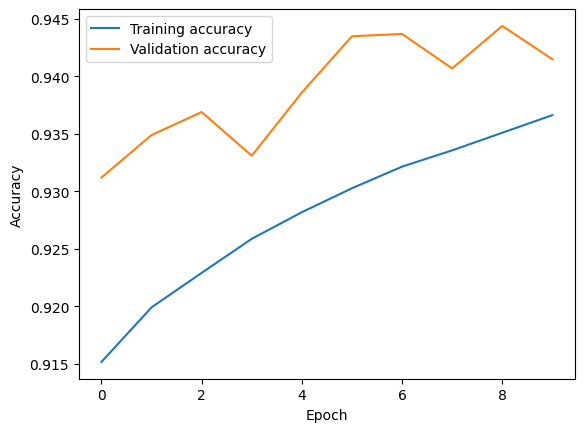

In [ ]:
# Accuracy chart
plt.plot(history_tl.history['accuracy'], label='Training accuracy')
plt.plot(history_tl.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

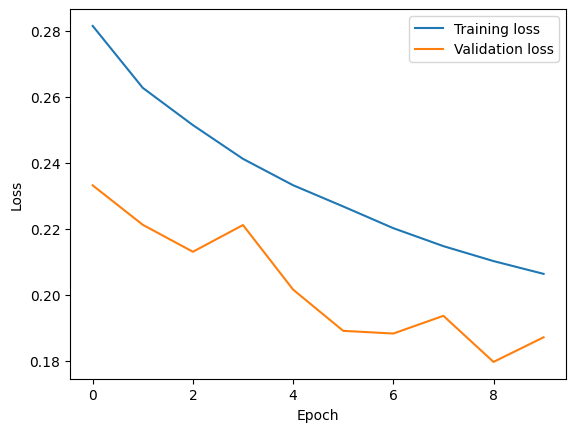

In [ ]:
# Loss chart
plt.plot(history_tl.history['loss'], label='Training loss')
plt.plot(history_tl.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Rescaling test images and converting to RGB format
test_images_rgb = np.array([tf.image.grayscale_to_rgb(tf.image.resize(img, (32, 32))) for img in test_images])

# Testing and Visualization

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


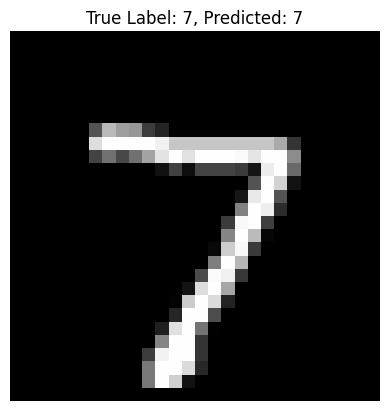

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


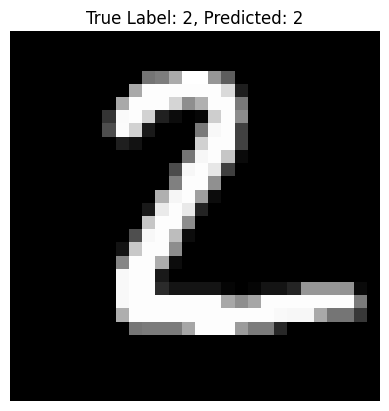

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


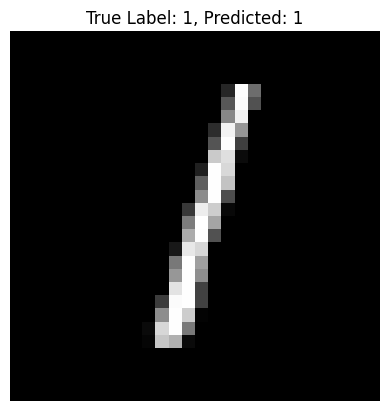

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


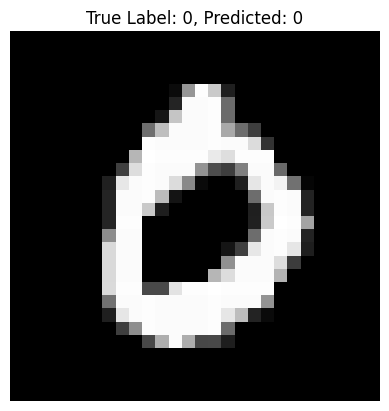

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


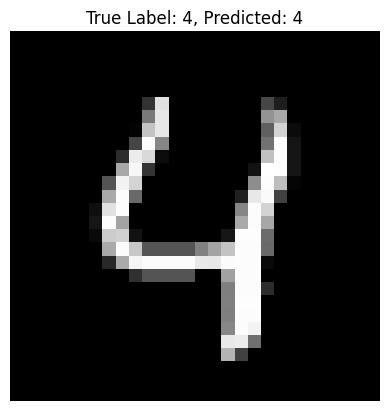

In [ ]:
# Testing the model on resized test images (28x28 grayscale)
for i in range(5):
    img = test_images[i]
    img = np.expand_dims(img, axis=0)  # Adding batch dimension
    prediction = model_tl.predict(img)
    predicted_label = np.argmax(prediction)

    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True Label: {test_labels[i]}, Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


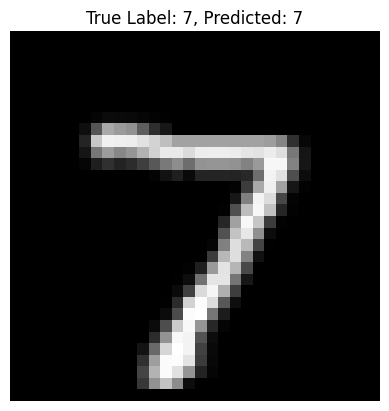

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


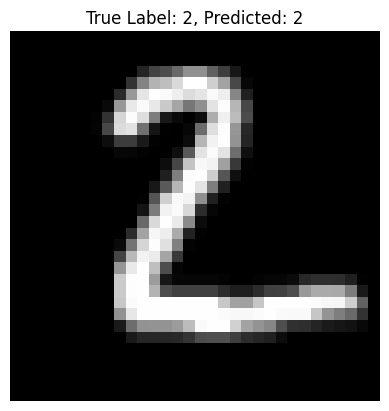

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


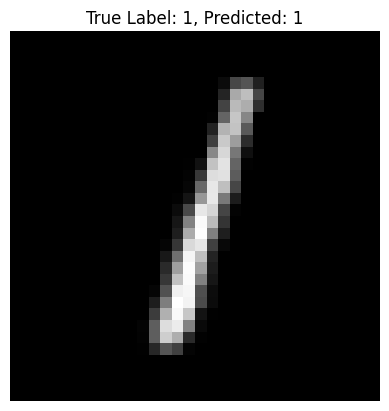

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


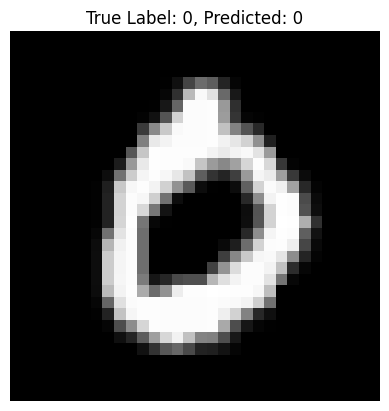

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


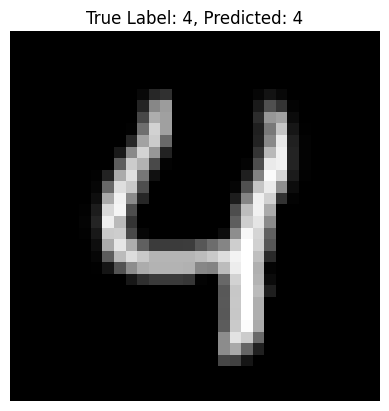

In [ ]:
# Resizing test images to 32x32 without changing the number of channels
test_images_resized = np.array([tf.image.resize(img, (32, 32)).numpy() for img in test_images])

# Testing the model on transformed images
for i in range(5):
    img = test_images_resized[i]
    img = np.expand_dims(img, axis=0)  # Adding batch dimension
    prediction = model_tl.predict(img)
    predicted_label = np.argmax(prediction)

    plt.imshow(test_images_resized[i].reshape(32, 32), cmap='gray')
    plt.title(f"True Label: {test_labels[i]}, Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()


In [ ]:
# Evaluation of the model on test data
test_loss, test_accuracy = model_tl.evaluate(test_images_resized, test_labels)

print(f'Test accuracy: {test_accuracy}')
print(f'Test loss: {test_loss}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 45s 135ms/step - accuracy: 0.9321 - loss: 0.2149
Test accuracy: 0.9415000081062317
Test loss: 0.1871364712715149


In [ ]:
# Show examples of misclassifications
for i in range(10):
    img = np.expand_dims(test_images_resized[i], axis=0)
    prediction = model_tl.predict(img)
    predicted_label = np.argmax(prediction)

    # We check if the predicted label is different from the real one
    if predicted_label != test_labels[i]:
        plt.imshow(test_images_resized[i].reshape(32, 32), cmap='gray')
        plt.title(f"True Label: {test_labels[i]}, Predicted: {predicted_label}")
        plt.axis('off')
        plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 77s 247ms/step


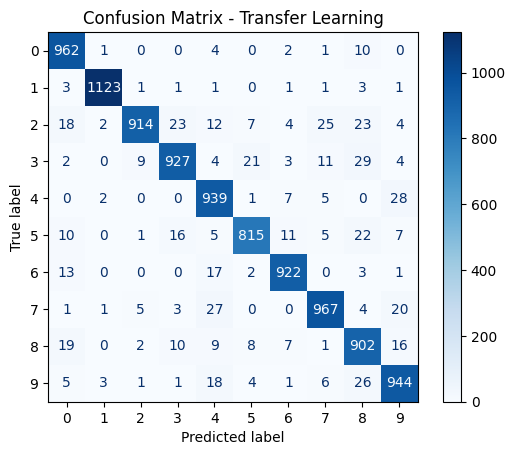

In [ ]:
# Transfer Learning model predictions on the test set
tl_predictions = model_tl.predict(test_images)
tl_predicted_labels = np.argmax(tl_predictions, axis=1)

# Confusion Matrix for Transfer Learning
cm_tl = confusion_matrix(test_labels, tl_predicted_labels)
disp_tl = ConfusionMatrixDisplay(confusion_matrix=cm_tl, display_labels=range(10))
disp_tl.plot(cmap='Blues')
plt.title('Confusion Matrix - Transfer Learning')
plt.show()


# Hyperparameter Tuning

In [ ]:
def create_and_train_cnn(filters=(32, 64, 64), kernel_size=(3, 3), epochs=10):
    # Creating a CNN model with modifiable parameters
    model = models.Sequential()
    model.add(layers.Conv2D(filters[0], kernel_size, activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(filters[1], kernel_size, activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(filters[2], kernel_size, activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    # Model compilation
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    #Training the model
    history = model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))

    # Evaluation of the model on the test set
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f'Test Accuracy: {test_acc}, Test Loss: {test_loss}')

    # Accuracy chart
    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Loss chart
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    return model


Function Definition:

Defines and trains a Convolutional Neural Network model with modifiable parameters:
- filters - Tuple specifying the number of filters for each convolutional layer.
- kernel_size -> Size of the convolution kernel (filter).
- epochs -> Number of training epochs.


Model Creation:
- Sequential model is initialized to stack layers sequentially.
- Convolutional Layers ->Apply filters to the input to extract features. Use ReLU activation to introduce non-linearity.
- MaxPooling Layers -> Downsample feature maps to reduce dimensionality and extract dominant features.
Pooling size (2, 2) halves the spatial dimensions.
- Flatten -> converts the 2D feature maps into a 1D vector.
- Dense Layers ->
Fully connected layers for classification.
First dense layer: 64 units with ReLU activation.
Second dense layer: 10 units with softmax activation for multi-class classification.

Model Compilation:
- Optimizer -> Adam for efficient weight updates.
- Loss Function -> sparse_categorical_crossentropy for integer-encoded class labels.
- Metrics -> Accuracy is used to monitor performance.

Model Traning:
- train_images and train_labels -> Training data and corresponding labels.
- epochs -> number of iterations over the entire dataset.
- validation_data -> validation set used to monitor performance during training.



Testing CNN with 5 epochs


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 31ms/step - accuracy: 0.8925 - loss: 0.3393 - val_accuracy: 0.9825 - val_loss: 0.0542
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.9855 - loss: 0.0458 - val_accuracy: 0.9878 - val_loss: 0.0362
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9892 - loss: 0.0345 - val_accuracy: 0.9879 - val_loss: 0.0389
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 31ms/step - accuracy: 0.9919 - loss: 0.0251 - val_accuracy: 0.9919 - val_loss: 0.0252
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 32ms/step - accuracy: 0.9938 - loss: 0.0196 - val_accuracy: 0.9893 - val_loss: 0.0351
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9853 - loss: 0.0485
Test Accuracy: 0.989300012588501, Test Loss: 0.03509606793522835


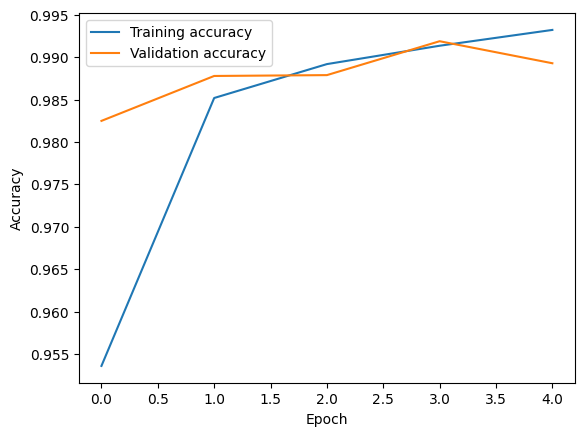

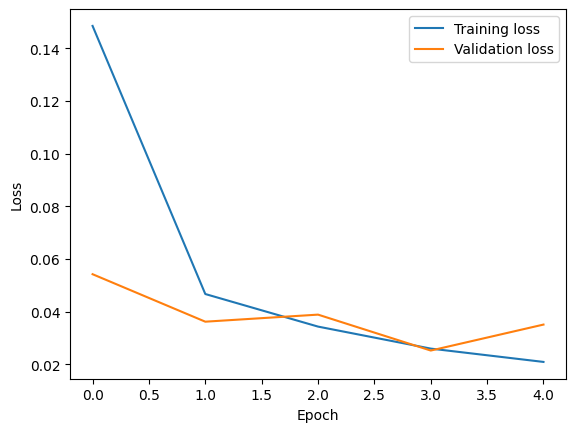

Testing CNN with 10 epochs
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 31ms/step - accuracy: 0.8875 - loss: 0.3436 - val_accuracy: 0.9820 - val_loss: 0.0542
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9849 - loss: 0.0479 - val_accuracy: 0.9876 - val_loss: 0.0386
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9901 - loss: 0.0310 - val_accuracy: 0.9862 - val_loss: 0.0423
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - accuracy: 0.9915 - loss: 0.0265 - val_accuracy: 0.9903 - val_loss: 0.0315
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 31ms/step - accuracy: 0.9944 - loss: 0.0186 - val_accuracy: 0.9904 - val_loss: 0.0335
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9950 - loss: 0.0147 - val_accuracy: 0.9902 - val_loss: 0.0355
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9961 - loss: 0.0117 - val_accuracy: 0.9910 - val_loss: 0.0344
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 31m

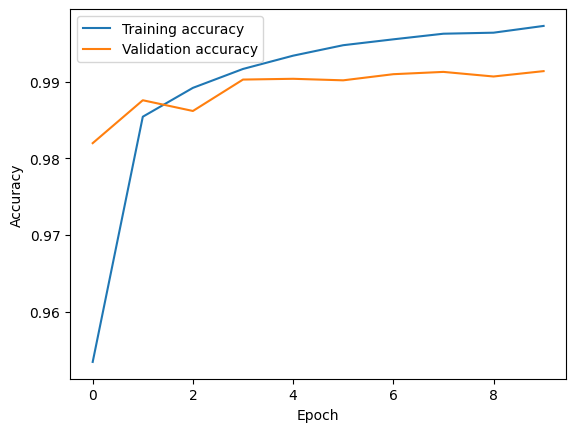

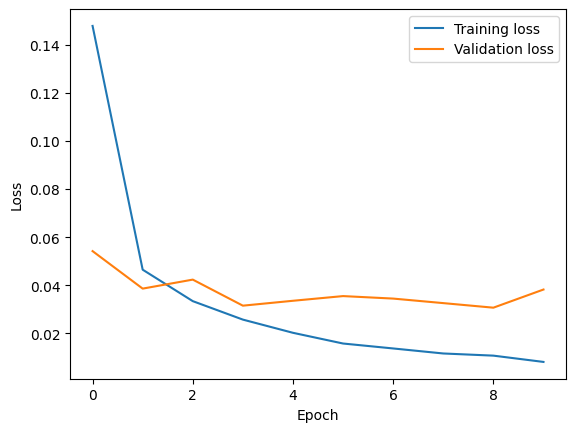

<Sequential name=sequential_7, built=True>

In [ ]:
# Testing with different numbers of epochs
print("Testing CNN with 5 epochs")
create_and_train_cnn(epochs=5)

print("Testing CNN with 10 epochs")
create_and_train_cnn(epochs=10)

Testing CNN with Fewer Filters
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.8781 - loss: 0.3918 - val_accuracy: 0.9693 - val_loss: 0.0915
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9807 - loss: 0.0621 - val_accuracy: 0.9860 - val_loss: 0.0455
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9857 - loss: 0.0425 - val_accuracy: 0.9884 - val_loss: 0.0364
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9890 - loss: 0.0334 - val_accuracy: 0.9901 - val_loss: 0.0308
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 17ms/step - accuracy: 0.9914 - loss: 0.0263 - val_accuracy: 0.9887 - val_loss: 0.0350
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.9926 - loss: 0.0218 - val_accuracy: 0.9903 - val_loss: 0.0335
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.9943 - loss: 0.0175 - val_accuracy: 0.9902 - val_loss: 0.0375
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s

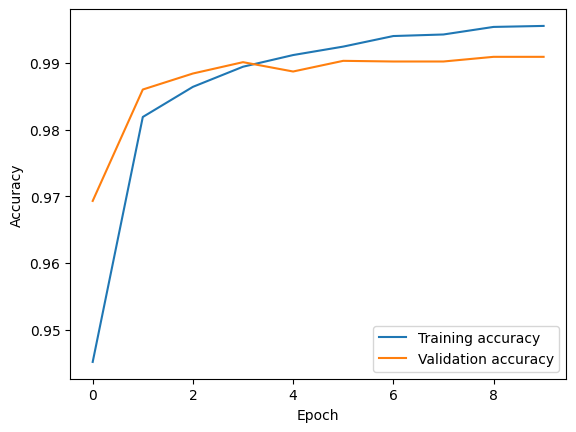

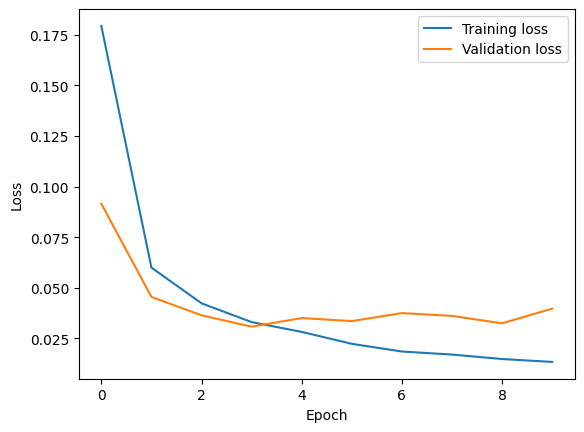

Testing CNN with more filters
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 158s 83ms/step - accuracy: 0.9112 - loss: 0.2811 - val_accuracy: 0.9826 - val_loss: 0.0512
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 200s 82ms/step - accuracy: 0.9864 - loss: 0.0435 - val_accuracy: 0.9888 - val_loss: 0.0378
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 207s 85ms/step - accuracy: 0.9915 - loss: 0.0270 - val_accuracy: 0.9854 - val_loss: 0.0483
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 196s 82ms/step - accuracy: 0.9935 - loss: 0.0201 - val_accuracy: 0.9907 - val_loss: 0.0324
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 150s 80ms/step - accuracy: 0.9944 - loss: 0.0161 - val_accuracy: 0.9907 - val_loss: 0.0339
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 146s 78ms/step - accuracy: 0.9962 - loss: 0.0116 - val_accuracy: 0.9911 - val_loss: 0.0342
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 204s 79ms/step - accuracy: 0.9969 - loss: 0.0096 - val_accuracy: 0.9904 - val_loss: 0.0406
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━

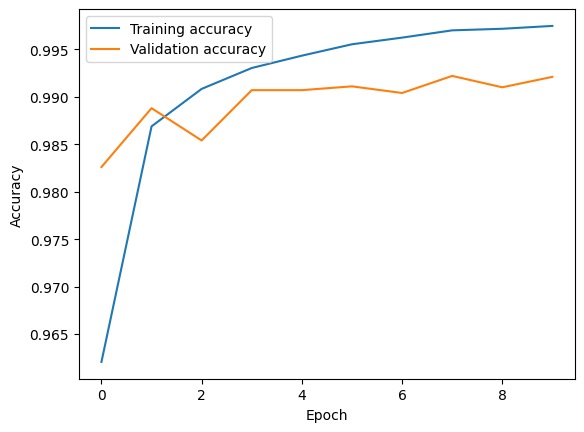

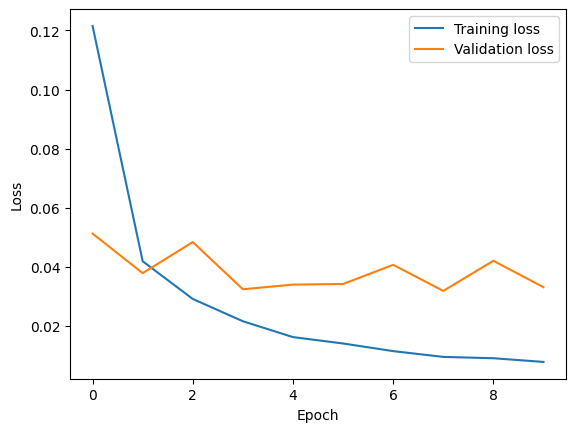

<Sequential name=sequential_9, built=True>

In [ ]:
# Testing with di
print("Testing CNN with Fewer Filters")
create_and_train_cnn(filters=(16, 32, 32), epochs=10)

print("Testing CNN with more filters")
create_and_train_cnn(filters=(64, 128, 128), epochs=10)


# Long Short-Term Memory (LSTM) Model

In [ ]:
#LSTM model definition
lstm_model = Sequential([
    LSTM(128, input_shape=(28, 28), return_sequences=False),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Model compilation
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model Definition:
- We used 128 units.
- input_shape=(28, 28) - Input data is a sequence of 28 timesteps, each with 28 features
- return_sequences=False - The LSTM only outputs the last timestep's result.
- Dense Layer -> Fully connected layer with 64 units and ReLU activation function.
- Output layer -> A dense layer with 10 units (one per class) and softmax activation for multi-class classification.


Model Compilation:
- Optimizer -> Adam is used for efficient weight updates.
- Loss Function -> sparse_categorical_crossentropy for classification tasks with integer-encoded labels.
- Metric -> Accuracy is used to evaluate the model's performance.


In [ ]:
#LSTM model training
history_lstm = lstm_model.fit(train_images.reshape(-1, 28, 28), train_labels,
                              epochs=10, batch_size=128, validation_data=(test_images.reshape(-1, 28, 28), test_labels))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 81ms/step - accuracy: 0.6594 - loss: 0.9984 - val_accuracy: 0.9261 - val_loss: 0.2330
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 78ms/step - accuracy: 0.9467 - loss: 0.1770 - val_accuracy: 0.9631 - val_loss: 0.1152
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 77ms/step - accuracy: 0.9660 - loss: 0.1102 - val_accuracy: 0.9714 - val_loss: 0.0922
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 76ms/step - accuracy: 0.9771 - loss: 0.0777 - val_accuracy: 0.9734 - val_loss: 0.0838
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 82ms/step - accuracy: 0.9803 - loss: 0.0637 - val_accuracy: 0.9819 - val_loss: 0.0574
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 81ms/step - accuracy: 0.9851 - loss: 0.0492 - val_accuracy: 0.9764 - val_loss: 0.0735
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 80ms/step - accuracy: 0.9864 - loss: 0.0438 - val_accuracy: 0.9825 - val_loss: 0.0575
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 81ms/step - accuracy: 0.9888 - loss: 0.0362 - 

Model training:
- The training and test images are reshaped to have dimensions (-1, 28, 28) to match the input shape required by the LSTM layer.
- -1 automatically adjusts for the number of samples.
- The model is trained for 10 iterations over the dataset.
- The data is processed in batches of 128 samples.
-  The validation set monitors performance during training.

In [ ]:
#LSTM model evaluation
lstm_test_loss, lstm_test_acc = lstm_model.evaluate(test_images.reshape(-1, 28, 28), test_labels)
print(f"LSTM Test Accuracy: {lstm_test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9803 - loss: 0.0643
LSTM Test Accuracy: 0.9836999773979187


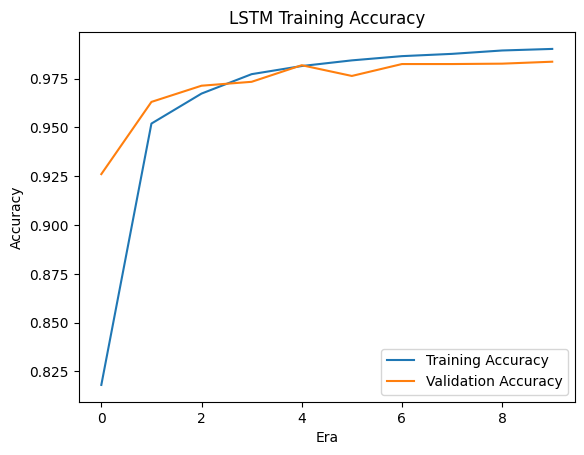

In [ ]:
# Accuracy chart
plt.plot(history_lstm.history['accuracy'], label='Training Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Training Accuracy')
plt.xlabel('Era')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


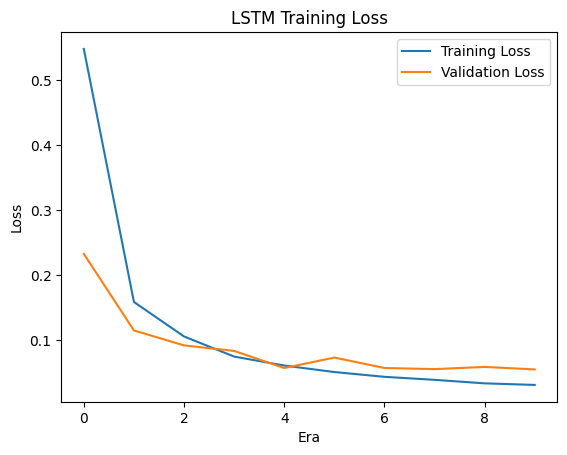

In [ ]:
# Loss chart
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training Loss')
plt.xlabel('Era')
plt.ylabel('Loss')
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


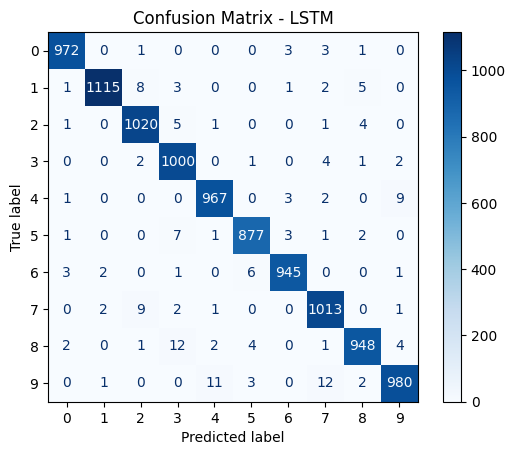

In [ ]:
# Predictions on the test set
lstm_predictions = lstm_model.predict(test_images.reshape(-1, 28, 28))
lstm_predicted_labels = np.argmax(lstm_predictions, axis=1)

# Confusion Matrix
cm = confusion_matrix(test_labels, lstm_predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - LSTM')
plt.show()

# Transformer Model
Exploring a simple transformer with a single self-attention head.

In [ ]:
class SimpleSelfAttention(Layer):
    def __init__(self, d_model):
        super(SimpleSelfAttention, self).__init__()
        self.query = Dense(d_model)
        self.key = Dense(d_model)
        self.value = Dense(d_model)

    def call(self, inputs):
        # Compute Query, Key, and Value
        Q = self.query(inputs)
        K = self.key(inputs)
        V = self.value(inputs)

        # Compute Attention Weights
        scores = tf.matmul(Q, K, transpose_b=True) / tf.sqrt(tf.cast(Q.shape[-1], tf.float32))
        weights = tf.nn.softmax(scores, axis=-1)

        # Compute Output
        output = tf.matmul(weights, V)
        return output


This class has three layers:
1. Query -> represent "query" vector (What am I looking for)
2. Key -> represent the "key" vector (What is this part about?)
3. Value -> represent "value" vector (What information does this part contain?)

Call method:
- Q, K nad V -> are transformed representations of the input, where Q defines the focus, K represents the features for comparison, and V contains the actual information used to compute attention.
- Attention Weights -> Attention scores are computed by taking the dot product of Q and the transpose of K. The scores are scaled by the square root of the vector size for numerical stability.
These scores are normalized using the softmax function to calculate attention weights.
-  Output -> calculated by combining the attention weights with the value (V) vectors. This highlights the most important parts of the input based on the attention mechanism.

In [ ]:
def build_simple_transformer(input_shape, d_model, num_classes):
    inputs = tf.keras.Input(shape=input_shape)  # Input: (28, 28)

    # Input transformation
    inputs_transformed = Dense(d_model)(inputs)  # Changing the input dimensions to match d_model

    # Self-Attention Layer
    attention = SimpleSelfAttention(d_model)(inputs_transformed)
    attention = LayerNormalization()(attention + inputs_transformed)  # Residual connection

    # Flatten and Classification Layers
    flattened = Flatten()(attention)
    ff_output = Dense(128, activation='relu')(flattened)
    outputs = Dense(num_classes, activation='softmax')(ff_output)

    # Build Model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model


he build_simple_transformer function:
- input transformation -> The input data (an image) is first transformed using a dense layer to match the required number of dimensions (d_model).
- Self-attention Layer -> The transformed input is passed through the self-attention layer, which calculates dependencies between different parts of the input. A residual connection (input + attention output) is added, and the result is normalized using layer normalization.
- Classification layers -> The attention output is flattened into a single vector.
It is passed through two dense layers:
    1. Layer has 128 units with a ReLU activation function.
    2. Layer predicts the output classes using softmax.



In [ ]:
# If the data is in the format (28, 28, 1), remove the last dimension:
train_images = train_images.squeeze()
test_images = test_images.squeeze()


Preprocessing:
f the input images have an extra dimension (shape (28, 28, 1)), it is removed using .squeeze() to make the shape compatible with the model (28, 28).

In [ ]:
# Model parameters
input_shape = (28, 28)  # Sequence of 28 rows of 28 features
d_model = 64
num_classes = 10

transformer_model = build_simple_transformer(input_shape, d_model, num_classes)

transformer_model.compile(optimizer='adam',
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])

# Model training
history_transformer = transformer_model.fit(train_images, train_labels,
                                             epochs=10, batch_size=128,
                                             validation_data=(test_images, test_labels))


# Model evaluation
test_loss, test_accuracy = transformer_model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.6941 - loss: 1.0211 - val_accuracy: 0.9198 - val_loss: 0.2801
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 47ms/step - accuracy: 0.9262 - loss: 0.2501 - val_accuracy: 0.9513 - val_loss: 0.1659
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.9541 - loss: 0.1593 - val_accuracy: 0.9652 - val_loss: 0.1219
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 65ms/step - accuracy: 0.9641 - loss: 0.1212 - val_accuracy: 0.9674 - val_loss: 0.1053
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.9715 - loss: 0.0945 - val_accuracy: 0.9727 - val_loss: 0.0901
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 44ms/step - accuracy: 0.9761 - loss: 0.0779 - val_accuracy: 0.9735 - val_loss: 0.0889
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.9786 - loss: 0.0707 - val_accuracy: 0.9775 - val_loss: 0.0757
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9823 - loss: 0.0581 - 

Model Parametrers:
- input_shape -> imput saze for each sample
- d_model -> Dimensionality of the model's internal feature space
- num_classes -> Number of output classes (digits 0-9)

In [ ]:
test_loss, test_accuracy = transformer_model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9711 - loss: 0.0928
Test Accuracy: 0.9764


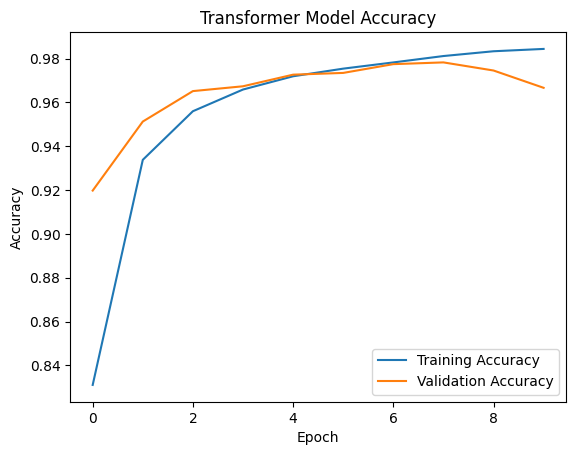

In [ ]:
plt.plot(history_transformer.history['accuracy'], label='Training Accuracy')
plt.plot(history_transformer.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transformer Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


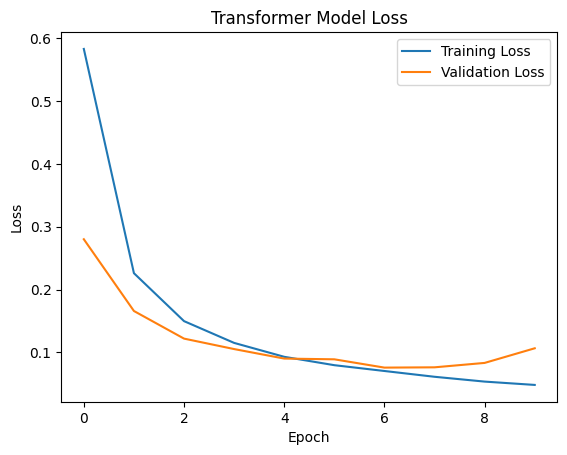

In [ ]:
plt.plot(history_transformer.history['loss'], label='Training Loss')
plt.plot(history_transformer.history['val_loss'], label='Validation Loss')
plt.title('Transformer Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


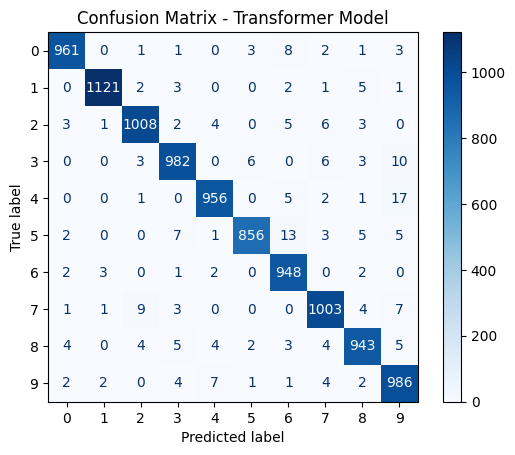

In [ ]:
# Transformer model predictions on the test set
transformer_predictions = transformer_model.predict(test_images)
transformer_predicted_labels = tf.argmax(transformer_predictions, axis=1).numpy()

# Confusion Matrix
cm = confusion_matrix(test_labels, transformer_predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))

disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Transformer Model')
plt.show()